# Sistemas LTI discretos

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

<a name="respuesta_al_impulso"></a>
## Respuesta al impulso

El concepto de la respuesta al impulso de un sistema discreto LTI y su conexión con su descripción mediante ecuaciones de diferencias se abordará a continuación.

### Señal de salida

La respuesta $g[n] = \mathcal{L} \{ f[n] \}$ de un sistema LTI a una entrada arbitraria $f[n]$ se puede encontrar aplicando la [propiedad del cedazo del impulso de Dirac discreto](../discrete_signals/standard_signals.ipynb#Dirac-Impulse). De esta forma, la señal de entrada se puede escribir como 
\begin{equation}
f[n] = \sum_{\kappa = -\infty}^{\infty} f[\kappa] \cdot \delta[n-\kappa]
\end{equation}

<div class="alert alert-block alert-info">
Esta ecuación implica que una secuencia discreta se puede descomponer en una suma infinita de impulsos amplificados y desplazados. Cada impulso se amplifica por el valor de la señal en cada posición de la variable discreta $n$. 
</div>
    
Entonces la salida será

\begin{equation}
g[n] = \mathcal{L} \left\{ \sum_{\kappa = -\infty}^{\infty} f[\kappa] \cdot \delta[n-\kappa] \right\}
\end{equation}

Como el sistema el lineal, podemos intercambiar la suma y el operador $\mathcal{L}$:

\begin{equation}
g[n] = \sum_{\kappa = -\infty}^{\infty} f[\kappa] \cdot \mathcal{L} \left\{ \delta[n-\kappa] \right\}
\end{equation}

donde $\mathcal{L} \{\cdot\}$ solo se aplica al impulso, dado que $f[\kappa]$ es una constante con respecto al índice $n$.


<div class="alert alert-block alert-info">
La respuesta del sistema al impulso de Dirac se denomina <a href="https://en.wikipedia.org/wiki/Impulse_response"><b>respuesta al impulso</b></a>. Se define como

\begin{equation}
h[k] = \mathcal{L} \left\{ \delta[n] \right\}
\end{equation}

Si el sistema es además invariante, la respuesta a un impulso escalado es $\mathcal{L} \left\{ \delta[n-\kappa]) \right\} = h[n-\kappa]$, la cual es una respuesta que no depende del valor del desplazamiento. Entonces, para un sistema discreto LTI se tiene

\begin{equation}
g[n] = \sum_{\kappa = -\infty}^{\infty} f[\kappa] \cdot h[n-\kappa] = f[n] * h[n] = (x \ast h)[n]
\end{equation}
</div>


Esta operación, tal como lo vimos anteriormente, es una  [*convolución*](https://en.wikipedia.org/wiki/Convolution). <font color="red">Las propiedades de un sistema LTI están totalmente caracterizadas por su respuesta al impulso</font>. La respuesta $g[n]$ de un sistema a una entrada arbitraria $f[n]$ se obtiene mediante la convolución de la entrada $f[n]$ con la respuesta al impulso $h[n]$.


<a name="ecuaciones_de_diferencias"></a>
### Ecuaciones de diferencias

La respuesta al impulso $h[n] = \mathcal{L} \{ \delta[n] \}$ se puede determinar a partir de los coeficientes de una ecuación de diferencias lineal que describa al sistema LTI, de la forma:


\begin{equation}
\sum_{\kappa=0}^{N} a_\kappa \; g[n-\kappa] = \sum_{\kappa=0}^{M} b_\kappa \; f[n-\kappa]
\end{equation}

Considerando la entrada $f[n] = \delta[n]$ y calculando la solución de la ecuación de diferencias obtenemos:

\begin{equation}
h[n] = \frac{1}{a_0} \left( \sum_{\kappa=0}^{M} b_\kappa \; \delta[n-\kappa] - \sum_{\kappa=1}^{N} a_\kappa \; h[n-\kappa] \right)
\end{equation}

***
### Respuesta al impulso finita (FIR)

Consideremos un sistema no-recursivo con $a_\kappa = 0$ para $n > 0$. Sin perder generalidad podemos asumir que $a_0 = 1$, dado que $\frac{1}{a_0}$ se puede incorporar en los otros coeficientes dividiendolos por $a_0$. La respuesta al impulso está dada por

\begin{equation}
h[n] = \sum_{\kappa=0}^{M} b_\kappa \; \delta[n-\kappa] = \begin{cases} b_\kappa & \text{for } 0 \leq n < M \\ 0 & \text{en otro caso} \end{cases}
\end{equation}

Observamos que la suma de la fórmula anterior constituye una convolución entre la señal dada por las muestras $b_\kappa$ y el impulso de Dirac $\delta[n]$. La respuesta al impulso de un sistema no recursivo es finita de largo  $M$. Sus valores están dados por los coeficientes $b_\kappa$ de la ecuación de diferencias que caracteriza el sistema. Una respuesta al impulso de largo finito de denomina [respuesta al impulso finita (FIR)](https://en.wikipedia.org/wiki/Finite_impulse_response). El término sistema o filtro FIR se utiliza como sinónimo de un sistema no recursivo, relacionando el largo de la respuesta al impulso con la estructura del sistema.

**Ejemplo - Promedio móvil**

La respuesta al impulso de un [filtro de promedio móvil](https://en.wikipedia.org/wiki/Finite_impulse_response#Moving_average_example) está dada por

\begin{equation}
h[n] = \frac{1}{N} \cdot \sqcap_N[n]
\end{equation}

Como una alternativa a la solución de la ecuación de diferencias mostrada anteriormente, la salida $g[n] = \mathcal{L} \{ f[n] \}$ se calcula mediante la convolución con la respuesta al impulso.

En la figura vemos el [diagrama de bloques](./30-Diagramas_de_flujo_discretos.ipynb) del sistema para el caso $N=6$. 

<img src="images/29/fir.png" width="300"/>

Como observamos, en el caso de sistemas no recursivos, los coeficientes de la respuesta al impulso se encuentran directamente en los coeficientes de la ecuación de diferencias, que en este caso es:

$$ g[n] = \frac{f[n]}{6} + \frac{f[n-1]}{6} + \frac{f[n-2]}{6} + \frac{f[n-3]}{6} + \frac{f[n-4]}{6} + \frac{f[n-5]}{6} $$

En el siguiente código calcularemos la salida del sistema cuya respuesta al impulso es este promedio móvil. Para esto, convolucionaremos una entrada sinusoidal a la cual se le ha agregado ruido con el rect de ancho 6. Vemos que este filtro funciona efectivamente como un filtro pasabajos y que logra atenuar bastante las altas frecuencias producto del ruido agregado.

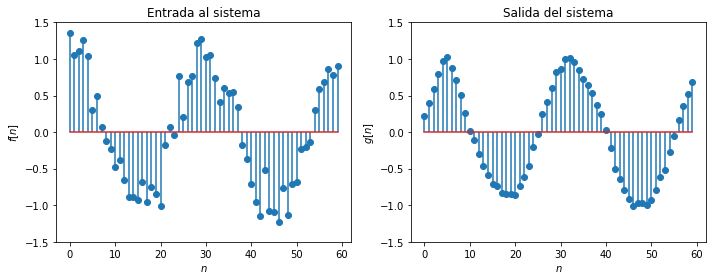

In [35]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline


def rect(n, N):
    return np.where((n >= 0) & (n < N), 1.0, 0.0)


np.random.seed(seed=0)

N = 6

n = np.arange(0, 60)
h = 1/N * rect(n, N)
f = np.cos(2*np.pi/30 * n) + .2 * np.random.normal(size=(len(n)))
g = np.convolve(f, h)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(n, f, use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$f[n]$')
plt.ylim([-1.5, 1.5])
plt.title('Entrada al sistema')

plt.subplot(122)
plt.stem(n, g[0:len(f)], use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel('$g[n]$')
plt.ylim([-1.5, 1.5])
plt.title('Salida del sistema')
plt.tight_layout()


plt.show()

Mientras más retrasos se agreguen a la respuesta al impulso más se atenúan las altas frecuencias, pero el costo en tiempo es mayor, ya el cálculo para cada muestra de la salida dependerá de un mayor número de muestras de la entrada. Esta es una manifestación entre la precisión que se quiere en tiempo vs la resolución deseada en frecuencia, que siguen una relación inversa.

**Ejercicio**

* Compare la salida $f[n]$ calculada mediante convolución con la salida derivada de la solución de la ecuación de diferencias.

***
### Respuesta al impulso infinita (IIR)

En el caso de un sistema recursivo, mediante la inspección de la fórmula para el cálculo de la respuesta al impulso a partir de los coeficientes de la ecuación de diferencias queda claro que la respuesta al impulso $h[n]$ para la muestra $n$ depende de la respuesta al impulso en las muestras pasadas $n-1, \dots, n-N+1$. Este feedback o retroalimentación generalmente resulta en una respuesta al impulso de largo infinito. Este tipo de respuesta de denomina [respuesta al impulso infinita (IIR)](https://en.wikipedia.org/wiki/Infinite_impulse_response). El término sistema o filtro IIR se usa como sinónimo de un sistema recursivo, relacionando el largo de la respuesta al impulso con la estructura del sistema.

Para una señal finita $f[n]$ la respuesta de un sistema recursivo no se puede calcular mediante una convolución lineal $g[n] = f[n] * h[n]$ en la práctica, dado el largo infinito de su respuesta al impulso. Como una solución práctica, muchas veces la respuesta al impulso es truncada a un largo finito, cuando ya ha decaído a un nivel razonable.

**Ejemplo**

Consideremos la respuesta al impulso $h[n]$ de un [sistema LTI recursivo de segundo orden](difference_equation.ipynb#Second-Order-System) con ecuación de diferencias:

\begin{equation}
g[n] - g[n-1] + \frac{1}{2} g[n-2] = f[n]
\end{equation}

La siguiente figura muestra el [diagrama de bloques](./30-Diagramas_de_flujo_discretos.ipynb) de este sistema.

<img src="images/29/iir.png" width="400"/>


Esta respuesta se puede obtener explícitamente mediante la [solución de la ecuación de diferencias](https://en.wikipedia.org/wiki/Recurrence_relation#Solving) a una entrada impulsiva. Esto se puede hacer mediante recursión, álgebra lineal, el método de constantes indeterminadas o la [Transformada Z](./38-Transformada_Z.ipynb).

Es claro que este sistema es del tipo IIR. Las primeras 25 muestras de la respuesta al impulso serán calculadas y graficadas en el siguiente código. 

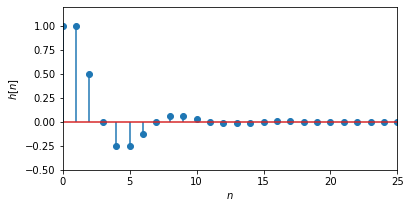

In [17]:
def dirac(n):
    return np.where(n == 0, 1.0, 0.0)


a = [1.0, -1.0, 1/2]
b = [1.0]

n = np.arange(256)
f = dirac(n)
h = signal.lfilter(b, a, f)

plt.figure(figsize=(6, 3))
plt.stem(n, h,  use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$h[n]$')
plt.axis([0, 25, -.5, 1.2])

plt.show()

Para ilustrar el decaímiento de la respuesta al impulso sobre un rango mayor, se suele graficar la magnitud $A[n]$ en una [escala de decibeles (dB)](https://en.wikipedia.org/wiki/Decibel).

\begin{equation}
A[n] = 20 \cdot \log_{10} ( |h[n]| ) \quad \text{in dB}
\end{equation}

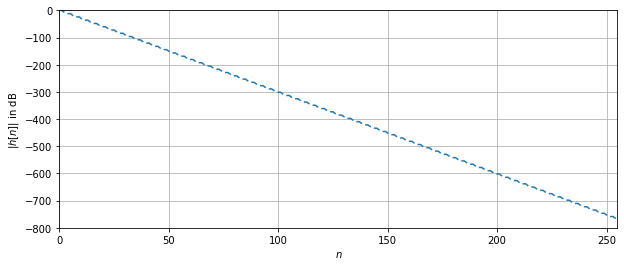

In [10]:
import warnings
warnings.filterwarnings('ignore', 'divide by zero encountered in log10')

plt.figure(figsize=(10, 4))
plt.plot(n, 20*np.log10(np.abs(h)))
plt.xlabel('$n$')
plt.ylabel(r'$|h[n]|$ in dB')
plt.axis([0, n[-1], -800, 0])
plt.grid()
plt.show()

Se observa que la magnitud de la respuesta al impulso ha decaído bastante después de 250 muestras. La respuesta al impulso truncada se puede utilizar para calcular la salida $g[n]$ mediante la convolución con la señal de entrada $f[n] = \sqcap_{20}[n]$. En este caso consideraremos las primeras 30 muestras de la respuesta al impulso.


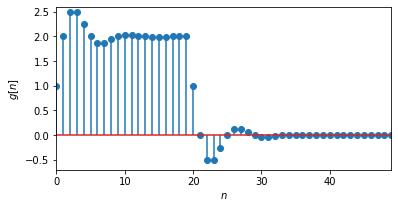

In [25]:
def rect(n, N):
    return np.where((n >= 0) & (n < N), 1.0, 0.0)


f = rect(n, 20)
g_ir = np.convolve(h[:30], f)

plt.figure(figsize=(6, 3))
plt.stem(n, g_ir[:len(n)], use_line_collection=True)
plt.xlabel('$n$')
plt.ylabel(r'$g[n]$')
plt.axis([0, 49, -.7, 2.6])

plt.show()

**Ejercicio**

* Compare la salida obtenida mediante la convolución con la calculada mediante la solución de la ecuación de diferencias.

***
## Propiedades de los sistemas LTI

Tal como estipulamos anteriormente, un sistema LTI se caracteriza por su respuesta al impulso, que denotaremos por $h[n]$. En las siguientes propiedades $f[n]$  es la entrada y $g[n]$ la salida.

### Memoria
Si un sistema LTI no tiene memoria, esto implica que 

$$ h[n-\kappa] \neq 0, \text{solo para } n = \kappa $$

### Invertibilidad
Un sistema LTI invertible cumple con:

$$ g[n] = f[n] \ast (h[n] \ast h^{-1}[n]) = f[n] $$

lo que implica que 

$$ h[n] \ast h^{-1}[n] = \delta[n] $$

### Estabilidad

Para que un sistema LTI sea estable se necesita que:

$$ \sum_{\kappa = -\infty}^{\infty} |h[\kappa]| < \infty $$

###  Respuesta a entrada cero
$$ f[n] = 0 \hspace{.2cm} \forall n \rightarrow g[n] = 0, \hspace{.2cm}  \forall n $$

Por linealidad:

$$ 0 f[n] \rightarrow 0 g[n] $$

### Causalidad

Un sistema causal implica que 

$$ h[n] = 0, \hspace{1cm}  n < 0 $$


Para un sistema LTI causal, se tiene que

$$ g[n] = \sum_{\kappa=-\infty}^{n} f[\kappa]h[n-\kappa] $$


<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>